In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Завдання 1
### Маємо вибірку 
$$\overline{X} = (X_{1}, \ldots , X_{n}), де \{ X_{i} \}$$
### незалежні однаково розподілені випадкові величини

### Рівень значимості маємо
$$\gamma = 0.05$$
$$z_{\gamma} = 1.36$$

In [2]:
gamma = 0.05
z_gamma = 1.36

## Завдання 1.

**1. Oбираємо рівень значимості**

Обираємо $\gamma$ та за таблицею для розподілу Колмогорова знаходимо $z_{\gamma}$ таке, що $K(z_{\gamma}) = 1 - \gamma$.

**Маємо, що**
$$\gamma = 0.05$$
$$z_{\gamma} = 1.36$$

**2. За формулою**
$$D_n(\bar x) = \max_{1 \le k \le n}{\{ \max{ \{ (F(x_{(k)})-\frac{k-1}{n}),(\frac{k}{n}-(F(x_{(k)}))\}}\}}$$
обчислюємо $D_n(\bar x)$.

**3. Якщо**
$$ \sqrt{n}D_n(\bar x)<z_{\gamma}, $$
то робимо висновок: статистичні дані не суперечать гіпотезі $H_0$. Якщо ж $\bar x \in Z_1$, то слід прийняти альтернативну гіпотезу $H_1$.

In [3]:
# lambdas that used for describing distribution characteristics ~ F(u, 1) ( ~ F(u, 1.3))
LAMBDA1 = 1
LAMBDA2 = 1.3

F_function_empirical = lambda u, X: np.count_nonzero(u >= X) / len(
    X)  # Функція розподілу. емпірична (calculating [sum v_i]/n)
F_function_theoretical = lambda u, LAMBDA: 1 - np.math.exp(
    (-1) * LAMBDA * u)  # Функція розподілу. теоретична (used from assignment)

In [4]:
# calculating D_n(x) (test statistics) for
def Dn_max(Xk, LAMBDA):
    n = len(Xk)
    Dn_m_p = np.max([k / n - F_function_theoretical(x, LAMBDA) for k, x in enumerate(Xk)])
    Dn_m_n = np.max([F_function_theoretical(x, LAMBDA) - (k - 1) / n for k, x in enumerate(Xk)])
    return [Dn_m_n, Dn_m_p]

### Для $\lambda = 1$

In [5]:
N = [pow(10, 3), pow(10, 4), pow(10, 5)]
X1_1000 = np.sort(np.random.exponential(LAMBDA1, size=N[0]))
X1_10000 = np.sort(np.random.exponential(LAMBDA1, size=N[1]))
X1_100000 = np.sort(np.random.exponential(LAMBDA1, size=N[2]))

D1 = [np.sqrt(N[0]) * max(Dn_max(X1_1000, LAMBDA1)), np.sqrt(N[1]) * max(Dn_max(X1_10000, LAMBDA1)),
      np.sqrt(N[2]) * max(Dn_max(X1_100000, LAMBDA1))]

RES_FOR_LAMBDA1 = ['H0' if element < z_gamma else 'false' for element in D1]


### Для $\lambda = 1.3$

In [6]:
X2_1000 = np.sort(np.random.exponential(LAMBDA2, size=N[0]))
X2_10000 = np.sort(np.random.exponential(LAMBDA2, size=N[1]))
X2_100000 = np.sort(np.random.exponential(LAMBDA2, size=N[2]))

D2 = [np.sqrt(N[0]) * max(Dn_max(X2_1000, LAMBDA2)), np.sqrt(N[1]) * max(Dn_max(X2_10000, LAMBDA2)),
      np.sqrt(N[2]) * max(Dn_max(X2_100000, LAMBDA2))]

RES_FOR_LAMBDA2 = ['H0' if element < z_gamma else 'false' for element in D2]

In [7]:
data_1 = {"Завдання 1": ["", "", ""], "D": D1, "Результат для lambda = 1": RES_FOR_LAMBDA1, "D2": D2,
          "Результат для lambda = 1": RES_FOR_LAMBDA2}
df1 = pd.DataFrame.from_dict(data_1, orient='index', columns=N)

In [8]:
df1

,1000,10000,100000
Завдання 1,,,
D,1.017146,0.581871,1.236667
Результат для lambda = 1,false,false,false
D2,6.248724,19.001761,60.020592


## Завдання 2
(перевірити чи той взагалі алгоритм)
1. Обираємо $\lambda$ та обчислюємо за таблицею $\chi^2$ - розподілу знаходимо $z_{\lambda}$ таке, що $T_{r-m-1}(z_{\lambda}) = 1 - \lambda$
2. Обчислюємо ймовірності {$p_i(\bar{\theta})$} та частоти {$v_i$}
за допомогою критерію $\chi^2$ перевірити гіпотези
3. Значення оцінки $\hat{\overline{\theta_n}}$ знаходимо за методом максимальної правдоподібності
4. Знаходимо за формулою $p_i(\hat{\overline{\theta_n}}), i = \overline{1, \ldots , r}$
5. Знаходимо за формулою значення статистики $\delta_n^{(r)}(\hat{\overline{\theta_n}})$

**Зауваження**
Кількість проміжків обирати з умови: $$r=\frac{30 \times n}{1000}$$

### $\chi^2$ - міра
$$\Delta^{(x)}_r=\sum^{r}_{i=1} \frac{(v_i-np_i)^2}{n p_i}$$

In [9]:
# p = 1 - 0.05 = 0.95
xi_average = 1.645

xi_30 = 43.8

r = lambda n: int(30 * n / 1000)
xi_big = lambda n: (xi_average + np.math.sqrt(2 * n - 1)) ** 2 / 2

xi_big(r(1000))

43.488497255243864

In [10]:
def xi_sqr(X):
    n = len(X)
    R = r(n)
    tmp = R / 30
    print(n, R, tmp)

    p = [F_function_theoretical(i / tmp, LAMBDA1) - F_function_theoretical((i - 1) / tmp, LAMBDA1) for i in
         range(1, R + 1)]
    v = np.zeros(R)
    for i in range(n):
        v[math.ceil(np.random.choice(X, 1) * tmp) - 1] += 1

    delta = np.sum([((v[i] - n * p[i]) ** 2) / (n * p[i]) for i in range(R)])
    return delta


res = xi_sqr(np.copy(X1_1000))

print(res)

1000 30 1.0
22.259860404297516


In [11]:
N2 = [pow(10, 3), pow(10, 4), pow(10, 5)]
XI = [17.70836618, 259.9453829, 2872.758544]  #[xi_big(N[i]) for i in range(3)]
D_2_1 = [xi_sqr(X1_1000), xi_sqr(X1_10000), xi_sqr(X1_100000)]
D_2_2 = [xi_sqr(X2_1000), xi_sqr(X2_10000), xi_sqr(X2_100000)]
RES_2_1 = ["H0" if D_2_1[i] < XI[i] else "False" for i in range(3)]
RES_2_2 = ["H0" if D_2_2[i] < XI[i] else "False" for i in range(3)]

data_2 = {"Завдання 2": ["", "", ""], "XI_sqr": XI, "lambda == 1": D_2_1, "RES_2_1": RES_2_1, "lambda == 1.3": D_2_2,
          "RES_2_2": RES_2_2}
df2 = pd.DataFrame.from_dict(data_2, orient='index', columns=N)

1000 30 1.0
10000 300 10.0
100000 3000 100.0
1000 30 1.0
10000 300 10.0
100000 3000 100.0


In [12]:
df2

,1000,10000,100000
Завдання 2,,,
XI_sqr,17.708366,259.945383,2872.758544
lambda == 1,6.648318,138.394346,3325.864009
RES_2_1,H0,H0,False
lambda == 1.3,422.521781,2259.4399,28251.251464
RES_2_2,False,False,False


Text(100000, 28251.251463978446, '28251.251')

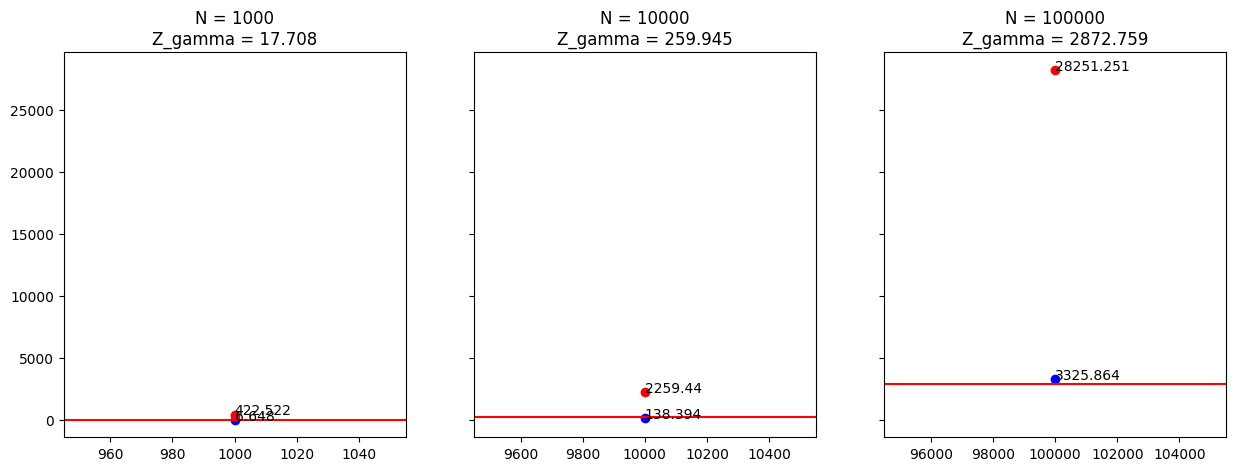

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax[0].plot(N[0], D_2_1[0], 'bo', N[0], D_2_2[0], 'ro')
ax[1].plot(N[1], D_2_1[1], 'bo', N[1], D_2_2[1], 'ro')
ax[2].plot(N[2], D_2_1[2], 'bo', N[2], D_2_2[2], 'ro')

ax[0].axhline(XI[0], color='r')
ax[1].axhline(XI[1], color='r')
ax[2].axhline(XI[2], color='r')

ax[0].set(title=f'N = {N[0]}\nZ_gamma = {round(XI[0], 3)}')
ax[1].set(title=f'N = {N[1]}\nZ_gamma = {round(XI[1], 3)}')
ax[2].set(title=f'N = {N[2]}\nZ_gamma = {round(XI[2], 3)}')

ax[0].annotate(f"{round(D_2_1[0], 3)}", (N[0], D_2_1[0]))
ax[0].annotate(f"{round(D_2_2[0], 3)}", (N[0], D_2_2[0]))

ax[1].annotate(f"{round(D_2_1[1], 3)}", (N[1], D_2_1[1]))
ax[1].annotate(f"{round(D_2_2[1], 3)}", (N[1], D_2_2[1]))

ax[2].annotate(f"{round(D_2_1[2], 3)}", (N[2], D_2_1[2]))
ax[2].annotate(f"{round(D_2_2[2], 3)}", (N[2], D_2_2[2]))

### Завдання 3

1. Генеруємо вибірку довжини $n$, ділимо її на відрізки по 2
2. Обчислюємо статистику $\mu$?
3.
4. Рахуємо критичну область $k_{\gamma} = re^{-\rho} + z_{\gamma}\sqrt{re^{-\rho}(1-(1+\rho)e^{-\rho})}$
5.
6. 4

In [14]:
def empty_box(data, lambda_box):
    #n = len(data)
    n = data
    ro = 2
    R = int(n / ro)
    z_gamma = 1.644853627

    v = np.zeros(R)
    for i in range(n):
        x = np.random.exponential(lambda_box, 1)
        v[math.ceil(F_function_theoretical(x, LAMBDA1) * R) - 1] += 1

    mu = np.count_nonzero(v == 0)
    e_pow_m_ro = math.exp(-ro)
    k_gamma = R * e_pow_m_ro + z_gamma * math.sqrt(R * e_pow_m_ro * (1 - (1 + ro) * e_pow_m_ro))

    return mu, k_gamma


empty_box(10000, 1)

(666, 709.6532428172949)

In [15]:
N3 = [pow(10, 3), pow(10, 4), pow(10, 5)]

D_1 = [empty_box(N2[i], LAMBDA1) for i in range(3)]
D_2 = [empty_box(N2[i], LAMBDA2) for i in range(3)]

D_1_res = [D_1[i][0] for i in range(3)]
D_1_crit = [D_1[i][1] for i in range(3)]

D_2_res = [D_2[i][0] for i in range(3)]
D_2_crit = [D_2[i][1] for i in range(3)]

RES_1 = ["H0" if D_1[i][0] < D_1[i][1] else "False" for i in range(3)]
RES_2 = ["H0" if D_2[i][0] < D_2[i][1] else "False" for i in range(3)]

data_3 = {"Завдання 3": ["", "", ""],
          "mu 1": D_1_res,
          "k_gamma 1": D_1_crit,
          "RES": RES_1,
          "mu 1.2": D_2_res,
          "k_gamma 1.3": D_2_crit,
          "RES2": RES_2
          }
df3 = pd.DataFrame.from_dict(data_3, orient='index', columns=N)

In [16]:
df3

,1000,10000,100000
Завдання 3,,,
mu 1,77,661,6708
k_gamma 1,78.09583,709.653243,6871.046044
RES,H0,H0,H0
mu 1.2,86,763,7483
k_gamma 1.3,78.09583,709.653243,6871.046044
RES2,False,False,False


### Завдання 4
$$ m = \dfrac{n}{2} $$
**Критерій однорідності Смірнова**

1. Обираємо рівень значимості $\gamma$
2. Обчислюємо статистику $D_{n,m}(\overline{x}, \overline{y}) = \max(D_{n,m}^{-}, D_{n,m}^{+})$
$$ D_{n,m}^{+} = \max_{1 \leq k \leq m} \left( \dfrac{k}{m} - \hat{\bar{F_n^{(1)}}}(y_{(k)}) \right) $$
$$ D_{n,m}^{-} = \max_{1 \leq k \leq m} \left( \hat{\bar{F_n^{(1)}}}(y_{(k)}) - \dfrac{k - 1}{m} \right) $$
3. Визначити критичну область $Crit = z_{\gamma} \sqrt{ \dfrac{1}{n} + \dfrac{1}{m} }$
4. Як $D_{n,m}(\overline{x}, \overline{y}) > Crit$ -- приймаємо $H_1$, інакше $H_0$

In [22]:
def get_X_2(X1, LAMBDA):
    return np.sort(np.random.exponential(LAMBDA, int(len(X1) / 2)))


def task_4(X1, X2):
    n = len(X1)
    m = len(X2)

    D_mn_plus = np.max([k / m - F_function_empirical(X2[k], X1) for k in range(m)])

    D_mn_sub = np.max([F_function_empirical(X2[k], X1) - (k - 1) / m for k in range(m)])

    D_mn = max(D_mn_sub, D_mn_plus)

    return [D_mn, z_gamma * np.math.sqrt(1 / n + 1 / m)]


X_half = get_X_2(X1_1000, 1)

task_4(X1_1000, X_half)

[0.04700000000000004, 0.0744902678207026]

### Випадок 1
$$ H_0\ :\ \bar{ X^{(1)}} \sim F(u,1), \bar{ X^{(2)}} \sim F(u,1) \\
\text{( Насправді так:} \\
   H_0\ :\ \bar{ X^{(1)}} \sim F(u,1); \bar{ X^{(2)}} \sim F(u,1) )$$

In [23]:
N = [1000, 10000, 100000]

D_mn_1 = np.zeros(3)
Res_mn_1 = np.zeros(3)
Crit_mn_1 = np.zeros(3)

D_mn_1[0], Crit_mn_1[0] = task_4(X1_1000, get_X_2(X1_1000, LAMBDA1))
D_mn_1[1], Crit_mn_1[1] = task_4(X1_10000, get_X_2(X1_10000, LAMBDA1))
D_mn_1[2], Crit_mn_1[2] = task_4(X1_100000, get_X_2(X1_100000, LAMBDA1))

Res_mn_1 = ["H0" if D_mn_1[i] < Crit_mn_1[i] else "False" for i in range(3)]

data_4_1 = {"Завдання 4": ["", "", ""], "lambda: 1": D_mn_1, "Crit": Crit_mn_1, "RES": Res_mn_1}
df_4_1 = pd.DataFrame.from_dict(data_4_1, orient='index', columns=N)
df_4_1

,1000,10000,100000
Завдання 4,,,
lambda: 1,0.067,0.0102,0.00347
Crit,0.07449,0.023556,0.007449
RES,H0,H0,H0


### Випадок 2
$$ H_0\ :\ \bar{ X^{(1)}} \sim F(u,1), \bar{ X^{(2)}} \sim F(u,1) \\ \text{( Насправді так: } \\
  \bar{ X^{(1)}} \sim F(u,1); \bar{ X^{(2)}} \sim F(u,1.2)\ ) $$

In [24]:
N = [1000, 10000, 100000]

D_mn_2 = np.zeros(3)
Res_mn_2 = np.zeros(3)
Crit_mn_2 = np.zeros(3)

D_mn_2[0], Crit_mn_2[0] = task_4(X1_1000, get_X_2(X1_1000, LAMBDA2))
D_mn_2[1], Crit_mn_2[1] = task_4(X1_10000, get_X_2(X1_10000, LAMBDA2))
D_mn_2[2], Crit_mn_2[2] = task_4(X1_100000, get_X_2(X1_100000, LAMBDA2))

Res_mn_2 = ["H0" if D_mn_2[i] < Crit_mn_2[i] else "False" for i in range(3)]

data_4_2 = {"Завдання 4": ["", "", ""], "lambda: 1.2": D_mn_2, "Crit": Crit_mn_2, "RES": Res_mn_2}
df_4_2 = pd.DataFrame.from_dict(data_4_2, orient='index', columns=N)
df_4_2

,1000,10000,100000
Завдання 4,,,
lambda: 1.2,0.121,0.099,0.09883
Crit,0.07449,0.023556,0.007449
RES,False,False,False


# Результати

In [26]:
res = df1.append(df2.append(df3.append(df_4_1.append(df_4_2))))

/tmp/ipykernel_35183/2771511774.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2.append(df3.append(df_4_1.append(df_4_2))))
/tmp/ipykernel_35183/2771511774.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2.append(df3.append(df_4_1.append(df_4_2))))
/tmp/ipykernel_35183/2771511774.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2.append(df3.append(df_4_1.append(df_4_2))))
/tmp/ipykernel_35183/2771511774.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2.append(df3.append(df_4_1.append(df_4_2))))


In [27]:
res.to_excel("./lab2_results.xlsx")
res.to_csv("./lab2_results.csv")
res

,1000,10000,100000
Завдання 1,,,
D,1.017146,0.581871,1.236667
Результат для lambda = 1,false,false,false
D2,6.248724,19.001761,60.020592
Завдання 2,,,
XI_sqr,17.708366,259.945383,2872.758544
lambda == 1,6.648318,138.394346,3325.864009
RES_2_1,H0,H0,False
lambda == 1.3,422.521781,2259.4399,28251.251464
RES_2_2,False,False,False
